# Data Visualization

In [78]:
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
tools.set_credentials_file(username='hengjiwang', api_key='5LRNQQ38BLqW8m0iMHoV')

In [92]:
listings = pd.read_csv('../data/2018_04_14/listings.csv')
prices = listings['price'].str.replace(r'[^-+\d.]', '').astype(float)

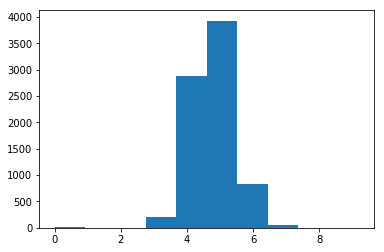

In [94]:
plt.hist(np.log(prices+1))
plt.show()

In [116]:
mapbox_access_token = 'pk.eyJ1IjoiaGVuZ2ppd2FuZyIsImEiOiJjanY3ZnZpaWswZmpiM3lxcHU1dW9xeDd4In0.NgpPwUWAhFc2Mp-qUEmEiA'

data = [
    go.Scattermapbox(
        lat=listings.latitude.tolist(),
        lon=listings.longitude.tolist(),
        # color=listings.price.tolist(),
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=2,
            # color = 'rgb(255,0,0)',
            color = np.log(prices+1), 
            colorscale = 'Jet',
            cmin = 2,
            cmax = 8
            
        ),
        text=[],
    )
]

layout = go.Layout(
    title='Seattle Airbnb Price',
    width=500,
    height=800,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=47.6062,
            lon=-122.3321
        ),
        pitch=0,
        zoom=10,
        style='dark'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')